In [1]:
pip install yfinance statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
def retrieve_stock_data(stock_symbol, start_date, end_date):
  data = yf.download(stock_symbol, start = start_date, end = end_date)
  return data

In [4]:
stock_data = retrieve_stock_data("AAPL", "2020-01-01", "2023-01-01")

/tmp/ipython-input-2654515673.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200
2020-01-07,72.065163,72.671356,71.845385,72.415353,108872000
2020-01-08,73.224388,73.526280,71.768064,71.768064,132079200


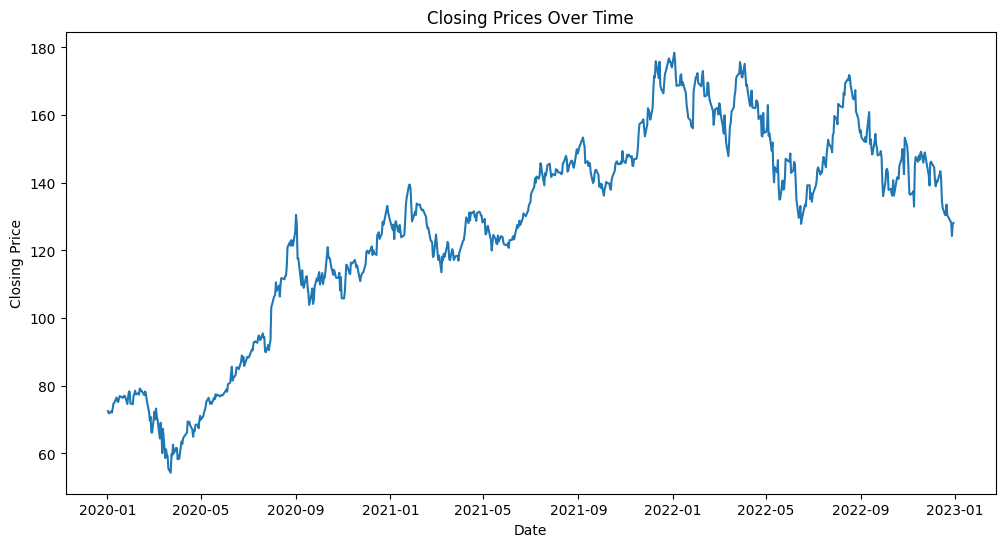

In [6]:
plt.figure(figsize=(12,6))
plt.plot(stock_data["Close"])
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [7]:
train_size = int(len(stock_data)*0.8)
train_data, test_data = stock_data[:train_size], stock_data[train_size:]

In [8]:
print(len(train_data))
print(len(test_data))

604
152


In [9]:
train_data = train_data["Close"]
test_data = test_data["Close"]

In [10]:
def find_best_arima_order(data, p_values, d_values, q_values):
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        try:
          model = ARIMA(data, order = (p,d,q))
          model_fit = model.fit()
          mse = mean_squared_error(data, model_fit.fittedvalues)
          if mse < best_score:
            best_score, best_cfg = mse, (p,d,q)
        except:
          continue
  return best_cfg

In [11]:
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

In [13]:
best_cfg = find_best_arima_order(train_data, p_values, d_values, q_values)
print("Best ARIMA parameters: ARIMA{}".format(best_cfg))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best ARIMA parameters: ARIMA(2, 0, 2)


In [14]:
model = ARIMA(train_data, order = best_cfg)
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
forecasted_values = model_fit.forecast(steps = len(test_data))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
mse = mean_squared_error(test_data, forecasted_values)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

Mean Squared Error (MSE): 256.04


In [18]:
forecasted_values = model_fit.forecast(steps = 180)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
forecast_dates = pd.date_range(start = test_data.index[-1], periods = 180, freq = "D")

In [20]:
forecast_df = pd.DataFrame({"Date": forecast_dates, "Forecasted": forecasted_values})

In [21]:
forecast_df.head()

,Date,Forecasted
604,2022-12-30,138.044453
605,2022-12-31,138.058478
606,2023-01-01,137.925894
607,2023-01-02,137.927595
608,2023-01-03,137.806867


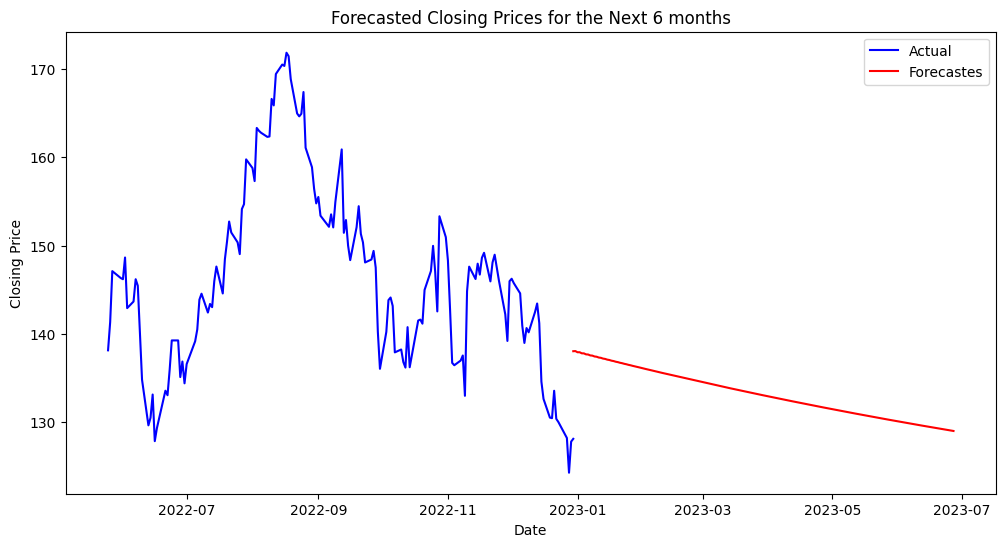

In [23]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label = "Actual", color = "b")
plt.plot(forecast_df["Date"], forecast_df["Forecasted"], label = "Forecastes", color = "r" )
plt.title("Forecasted Closing Prices for the Next 6 months")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()